<div class="alert alert-block alert-info " style=' color:MidnightBlue; background-color: AliceBlue ;  border-radius: 30px; border-color: black; '>
<hr><h1 > TP SVM - MIN 5A -  <img  src="   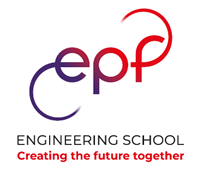" align="right"  width="100" > 
 <br>
     <br>
     <br>
 <hr>
</div>
<div class="alert alert-block alert-info" style='color:midnightblue; background-color: AliceBlue ; border-radius: 30px; border-color: black; '> 
 <br>
    <ol>Le but de ce TP est d’implémenter les SVM pour résoudre des problèmes de classification et de régression.<br>
    </ol>
     <br>
    </div>

*Entrez votre Nom, Prénom et Majeure ici*

<div class="alert alert-block alert-info" style='color:midnightblue; background-color: AliceBlue ; border-radius: 30px; border-color: black; '> 
    <hr><h2>1.	Classification SVM</h2><hr>    
    <ol>
Nous allons voir deux types d’implémentions de la classification SVM linéaire : une implémentation
qui utilise LinearSVC et une autre qui utilise SGDClassifier. <br> <br>
<B>1.1 Implémentation n°1 de la classification SVM linéaire :</B> <br> <br>
a) Chargez la base de données MNIST. Pour cela, commencez par importer la fonction fetch_openml de la librairie sklearn.datasets. Puis, utilisez cette fonction pour charger la base
de données en mettant comme paramètre de cette fonction 'mnist_784'. <br><br>
b) Soit X les observation (les images) et Y les étiquettes correspondantes (les classes). <br>
Sachant qu’on accède aux images des chiffres via l’attribut data et aux étiquettes via l’attribut target appliqués tous les deux à la base de données (nom_bd.data et nom_bd.target), afficher la taille des données X et Y. <br><br>
c) Choisissez quelques images de cette base de données, redimensionner ces images choisies en matrices 28×28. Puis, visualisez-les en utilisant l’instruction imshow() et en choisissant comme paramètre une palette de couleur binaire : noir et blanc cmap = matplotlib.cm.binary. <br><br>
d) Décomposer cette base de données en 2 bases : une base d’apprentissage
(d’entrainement) et une base de test en sélectionnant les 60 000 premières images pour l’apprentissage et les 10 000 restantes pour le test. <br><br>
e) Faites en sorte que les exemples soient aléatoirement répartis dans la base
d’apprentissage en utilisant par exemple np.random.permutation. Le but est que tout tirage d’un sous ensemble comporte à peu près la même proportion de chaque chiffre. <br><br>
f) Intéressons-nous maintenant à un classifieur binaire. Expliquer ce qu’est qu’un classifieur binaire. <br><br>
g) Notre classifieur va apprendre à reconnaitre le chiffre 7 contre tous les autres chiffres.
Transformez alors les étiquettes Y_train et Y_test en étiquettes binaires True si l’étiquette est un 7 et False sinon. <br><br>
h) Créer un classifieur SVM linéaire implémenté via LinearSVC. <br><br>
i) Entrainez ce classifieur sur les données d’apprentissage créée X_train et Y_train. <br><br>
j) Effectuer une prédiction du classifieur ainsi entrainé sur les données suivantes :
X[45720], X[4030], X[1009] et X[12345] et affichez le résultat de cette prédiction.
Vérifier le résultat obtenu en affichant ces images. Que constate-t-on ? <br><br>
k) Une des méthodes les plus courante d’évaluation d’apprentissage supervisé est la méthode par validation croisée. Importer la fonction cross_val_score() de la librairie sklearn.model_selection. Utiliser cette fonction sur les données d’apprentissage en utilisant 3 plis au lieu de 10 par défaut et afficher le score de chacun de ces 3 plis. <br><br>
l) Calculer et afficher le score global de la validation croisée sur la base d’apprentissage. <br><br>
m) Importez la fonction cross_val_predict() de la librairie sklearn.model_selection. Utiliser cette fonction sur les données d’apprentissage en utilisant 3 plis au lieu de 10 par défaut et stockez le résultat dans une variable Y_train_predict. <br><br>
n) Affichez la matrice de confusion obtenue sur la base d’apprentissage. <br><br>
o) Affichez les scores : prédiction, rappel et f1 sur la base d’apprentissage. <br><br>
p) Récupérer les résultats de prédiction en utilisant cross_val_predict() sur la base d’apprentissage avec 3plis et en précisant method="decision_function". <br><br>
q) Récupérez les données de prédictions, rappels et thresholds (le seuil de déicison) sur la base d’apprentissage dans le but de tracer dans le même graphique la précisi on en fonction de thresholds et le rappel en fonction de thresholds. Expliquez ce graphique. <br><br>
r) Tracer sur une autre figure la précision en fonction du rappel. <br><br>
s) Tracer la courbe ROC   <br>      
 <br>
    </ol>
</div>

In [1]:
import numpy as np

from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
X = mnist.data
Y = mnist.target

print(X. shape)
print(Y. shape)


(70000, 784)
(70000,)


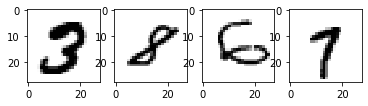

In [29]:
import  matplotlib
import  matplotlib.pyplot as plt
image= mnist.data.to_numpy()
plt.subplot(141)
plt.imshow((image[12345].reshape(28,28)), cmap=plt.cm.gray_r, interpolation='nearest')
plt.subplot(142)
plt.imshow((image[1009].reshape(28,28)), cmap=plt.cm.gray_r, interpolation='nearest')
plt.subplot(143)
plt.imshow((image[4030].reshape(28,28)), cmap=plt.cm.gray_r, interpolation='nearest')
plt.subplot(144)
plt.imshow((image[45720].reshape(28,28)), cmap=plt.cm.gray_r, interpolation='nearest')

In [36]:
X= mnist.data.to_numpy()
X_train,X_test,Y_train,Y_test = X[:60000],X[60000:],Y[:60000],Y[60000:]
shuffle_index = np.random.permutation(60000) 
X_train,Y_train = X_train[shuffle_index],Y_train[shuffle_index]

Y_train_7 = (Y_train == "7")
Y_test_7 = ( Y_test == "7")
#méthode1
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
sgd_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("linear_svc", LinearSVC(C=1,  dual=False, random_state=42,max_iter=1200000)),])

some_digit4=X[45720]
some_digit3 =X[4030]
some_digit2 =X[1009]
some_digit1 =X[12345]
sgd_clf.fit(X_train,Y_train_7)

print(sgd_clf.predict([some_digit4]))# some_digit4=X[45720] prédiction = true
print(sgd_clf.predict([some_digit3]))#some_digit3 =X[4030] prédiction =false
print(sgd_clf.predict([some_digit2]))#some_digit2 =X[1009] prédiction = false
print(sgd_clf.predict([some_digit1]))#some_digit1 =X[12345] prédiction = false



[ True]
[False]
[False]
[False]


In [ ]:
from  sklearn . model_selection  import  cross_val_score  
print("cross_val_score = ", cross_val_score(sgd_clf,X_train,Y_train_7,cv=3)) 
#[0.98235 0.98155 0.982]
#le score global = la moyenne des 3 scores précédents
from statistics import mean
print("score global = ",mean(cross_val_score(sgd_clf,X_train,Y_train_7,cv=3)))


from  sklearn . model_selection  import  cross_val_predict
Y_train_pred = cross_val_predict ( sgd_clf ,  X_train ,  Y_train_7 ,  cv=3)      
from  sklearn . metrics  import  confusion_matrix
confusion_matrix ( Y_train_7 ,  Y_train_pred)

#Y_train_perfect_predictions = Y_train_7 
#confusion_matrix(Y_train_7,Y_train_perfect_predictions)

from  sklearn.metrics  import  precision_score,recall_score
print("precision = ",precision_score(Y_train_7, Y_train_pred))
 
print("rappel = ",recall_score(Y_train_7,Y_train_pred))

from  sklearn.metrics  import f1_score
print("f1 = ",f1_score(Y_train_7,Y_train_pred))
"""
0.9157708968394032
0.9110933758978452
0.9134261481837094
"""
Y_scores = cross_val_predict(sgd_clf,X_train,Y_train_7,cv=3,method="decision_function")
from  sklearn.metrics  import  precision_recall_curve
print(Y_scores.shape)
precisions,recalls,thresholds = precision_recall_curve(Y_train_7,Y_scores[:])

plt.plot(thresholds,precisions[:-1],'b-',label="Précision",linewidth=2)
plt.plot(thresholds,recalls[:-1],"g-",label="Rappel",linewidth =2)
plt.xlabel("Threshold",fontsize =16)
plt.legend(loc="upper left",fontsize =16)
plt.ylim([0,1])

plt.plot(recalls[:-1],precisions[:-1],'b-',linewidth=2)
plt.xlabel("Rappel",fontsize =16)
plt.ylabel("Précision",fontsize =16)

from  sklearn.metrics  import  roc_curve
fpr,tpr,thresholds = roc_curve(Y_train_7,Y_scores)
plt.plot(fpr,tpr,linewidth=2)
plt.plot([0,1],[0,1],'k-')
plt.axis([0,1,0,1])
plt.xlabel('taux de faux positifs',fontsize=16)
plt.ylabel('taux de vrais positifs' ,fontsize=16)


cross_val_score =  [0.98215 0.9799  0.98265]
score global =  0.9815666666666667


<div class="alert alert-block alert-info" style='color:MidnightBlue; background-color: AliceBlue ; border-radius: 30px; border-color: black; '>
    
<B>1.2 Implémentation n°2 du classificateur SVM linéaire :</B><br><br>
a) Reprendre les étapes de (a) jusqu’à (g) inclus.<br><br>
b) Créer un classifieur SVM linéaire implémenté via SGDClassifier en prenant comme paramètre random_state=42.<br><br>
c) Entrainez ce classifieur sur les données d’apprentissage créée X_train et Y_train.<br><br>
d) Effectuer une prédiction du classifieur ainsi entrainé sur les données suivantes :
X[45720], X[4030], X[1009] et X[12345] et affichez le résultat de cette prédiction.
Vérifier le résultat obtenu en affichant ces images. Que constate-t-on ?<br><br>
e) Utilisez la méthode de la validation croisée sur le jeu de données d’apprentissage en
utilisant 3 plis. Affichez le score global et comparez le résultat obtenu avec celui de l’implémentation n°1. Donner une explication.<br><br>
f) Reprendre toutes les autres étapes de (1.1) pour afficher la matrice de confusion et tracer les trois courbes précédentes.<br>
    </div>

(70000, 784)
(70000,)
[ True]
[False]
[0.98125 0.97005 0.96195]
0.8735158311345647
0.8454908220271349
0.8592748803633709
(60000,)


Text(0, 0.5, 'Précision')

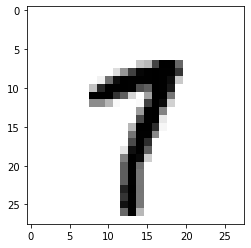

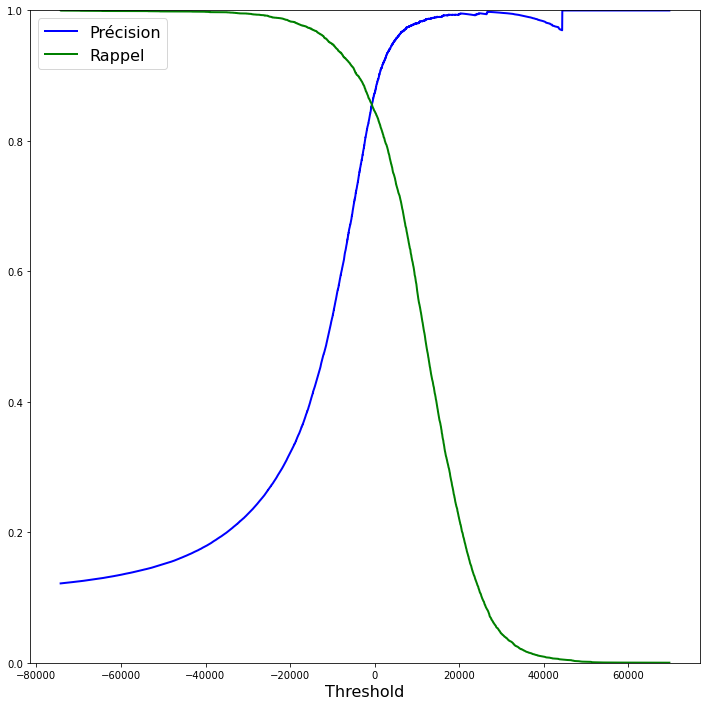

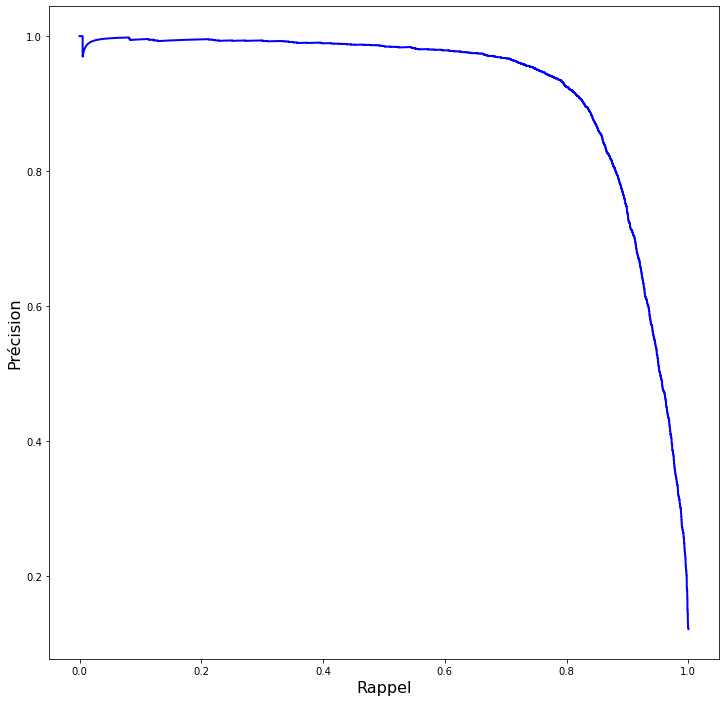

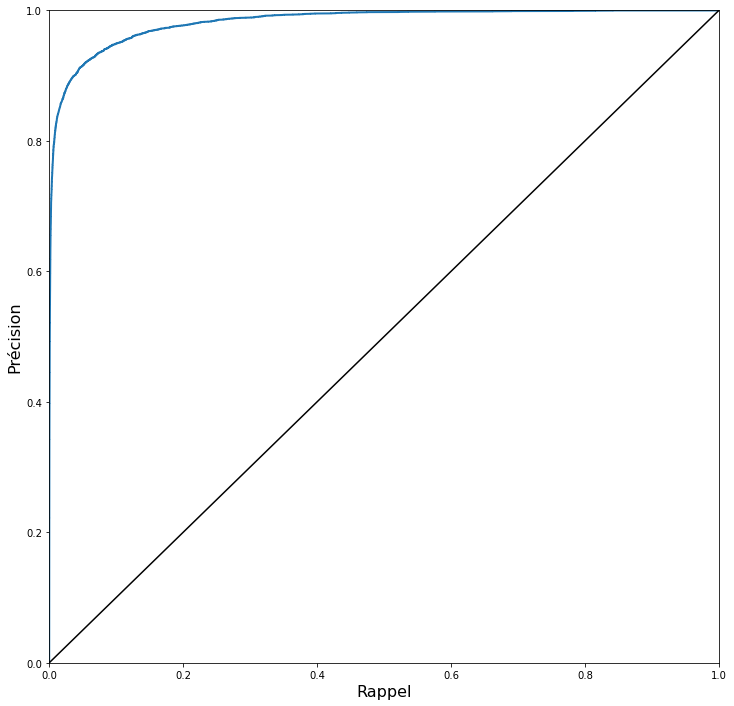

In [5]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
X = mnist.data
Y = mnist.target

print(X. shape)
print(Y. shape)

X= mnist.data.to_numpy()
X_train,X_test,Y_train,Y_test = X[:60000],X[60000:],Y[:60000],Y[60000:]
shuffle_index = np.random.permutation(60000) 
X_train,Y_train = X_train[shuffle_index],Y_train[shuffle_index]

Y_train_7 = (Y_train == "7")
Y_test_7 = ( Y_test == "7")

some_digit1 = X[12345]#3
some_digit_image1 = some_digit1.reshape(28,28)
plt.imshow(some_digit_image1,cmap = matplotlib.cm.binary,interpolation="nearest")

some_digit2 = X[1009]#8
some_digit_image2 = some_digit2.reshape(28,28)
plt.imshow(some_digit_image2,cmap = matplotlib.cm.binary,interpolation="nearest")

some_digit3 = X[4030]#6
some_digit_image3 = some_digit3.reshape(28,28)
plt.imshow(some_digit_image3,cmap = matplotlib.cm.binary,interpolation="nearest")

some_digit4 = X[45720]
some_digit_image4 = some_digit4.reshape(28,28)
plt.imshow(some_digit_image4,cmap = matplotlib.cm.binary,interpolation="nearest")

from  sklearn.linear_model  import  SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train,Y_train_7)
print(sgd_clf.predict([some_digit4]))
print(sgd_clf.predict([some_digit3]) )
     
from  sklearn . model_selection  import  cross_val_score  
print(cross_val_score(sgd_clf,X_train,Y_train_7,cv=3)) 

from  sklearn . model_selection  import  cross_val_predict
Y_train_pred = cross_val_predict ( sgd_clf ,  X_train ,  Y_train_7 ,  cv=3)      
from  sklearn . metrics  import  confusion_matrix
confusion_matrix ( Y_train_7 ,  Y_train_pred)

Y_train_perfect_predictions = Y_train_7 
confusion_matrix(Y_train_7,Y_train_perfect_predictions)

from  sklearn.metrics  import  precision_score,recall_score
print(precision_score(Y_train_7, Y_train_pred))
 
print(recall_score(Y_train_7,Y_train_pred))

from  sklearn.metrics  import f1_score
print(f1_score(Y_train_7,Y_train_pred))

Y_scores = cross_val_predict(sgd_clf,X_train,Y_train_7,cv=3,method="decision_function")
from  sklearn.metrics  import  precision_recall_curve
print(Y_scores.shape)
precisions,recalls,thresholds = precision_recall_curve(Y_train_7,Y_scores[:])
plt.figure(figsize=(12, 12))
plt.plot(thresholds,precisions[:-1],'b-',label="Précision",linewidth=2)
plt.plot(thresholds,recalls[:-1],"g-",label="Rappel",linewidth =2)
plt.xlabel("Threshold",fontsize =16)
plt.legend(loc="upper left",fontsize =16)
plt.ylim([0,1])
plt.figure(figsize=(12, 12))
plt.plot(recalls[:-1],precisions[:-1],'b-',linewidth=2)
plt.xlabel("Rappel",fontsize =16)
plt.ylabel("Précision",fontsize =16)

from  sklearn.metrics  import  roc_curve
fpr,tpr,thresholds = roc_curve(Y_train_7,Y_scores)
plt.figure(figsize=(12, 12))
plt.plot(fpr,tpr,linewidth=2)
plt.plot([0,1],[0,1],'k-')
plt.axis([0,1,0,1])
plt.xlabel('tpr',fontsize=16)
plt.ylabel('fpr' ,fontsize=16)

In [2]:
#Saisir votre code ici


<div class="alert alert-block alert-info" style='color:MidnightBlue; background-color: AliceBlue ; border-radius: 30px; border-color: black; '>
    <hr><h2>2. Classification SVM multi classes </h2><hr>    
    
La base de données MNIST étant trop volumineuse avec ses 70 000 images pour une classification multi-classes. Nous utiliserons une base de données plus réduite de chiffres manuscrit qui est la base de données digits.<br><br>
2.1 Chargez la base de données via l’instruction datasets.load_digits() et cela après avoir importer datasets.<br><br>
2.2 Sachant qu’on accède aux images des chiffres via l’attribut images et aux étiquettes via l’attribut target appliqués tous les deux à la base de données (nom_bd.images et nom_bd.target), afficher la taille des données X et Y. Déduire le nombre d’images dans la base de données et la taille de ces images.<br><br>
2.3 Choisissez quelques images de cette base de données et visualisez-les. <br><br>
2.4 Redimensionner la matrice X qui représente les images pour qu’elle ait une taille =nombre d’images×64.<br><br>
2.5 Appliquez un classifieur SVM en utilisant SVC avec comme paramètre gamma=0.001.<br><br>
2.6 Utilisez l’instruction train_test_split pour diviser la base de données X et Y en base d’apprentissage X_train et Y_train et en base de test X_test et Y_test avec un ratio de taille de test =0.5 et le paramètre shuffle à False<br><br>
2.7 Entrainez la classifieur sur les données d’apprentissage.<br><br>
2.8 Effectuer une prédiction du classifieur ainsi entrainé sur deux images choisies aléatoirement. Affichez le résultat de la prédiction et vérifiez ce résultat visuellement.<br><br>
2.9 Réalisez la prédiction sur les données de test.<br><br>
2.10 Affichez la matrice de confusion obtenue sur les données de test.<br><br>
2.11 Affichez les différentes métriques de classification.<br>


</div>

[9]
[6]
Classification report for classifier SVC(gamma=0.001):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted avg       0.97      0.97      0.97       899


Confusion matrix:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 88  1  0  0  0  0  0  1  1]
 [ 0  0 85  1  0  0  0  0  0  0]
 [ 0  0  0 79  0  3  0  4  5  0]
 [ 0  0  0  0 88  0  0  0  

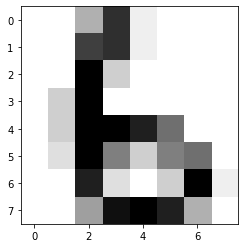

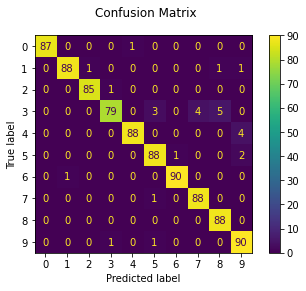

In [6]:
#Insérez votre code ici
import matplotlib
import matplotlib.pyplot as plt


from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

# La base de données digits
digits = datasets.load_digits()
X1=digits.images
Y1=digits.target

#affcihage d'une image
some_digit = X1[109]#5
plt.imshow(some_digit,cmap = matplotlib.cm.binary,interpolation='nearest')

#Pour appliquer un classificateur sur ces données, nous devons aplatir l'image,
# transformer les données dans une matrice (nbr_dimages, nbr_de_pixels):
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# créer un classifieur SVM
classifier = svm.SVC(gamma=0.001)

# Partager la base de données en 2 bases : une base d'apprentissage + une base de test
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False)

# Entrainer le classifieur sur la base d'apprentissage
classifier.fit(X_train, y_train)

# prédiction sur quelques images de la base de test et vérification visuelle
print(classifier.predict(X_test[[3]]))
plt.imshow(X_test[[3]].reshape(8,8),cmap = matplotlib.cm.binary,interpolation='nearest')

print(classifier.predict(X_test[[137]]))
plt.imshow(X_test[[137]].reshape(8,8),cmap = matplotlib.cm.binary,interpolation='nearest')

# Prédiction sur la base de test:
predicted = classifier.predict(X_test)

#affichage de la matrice de confusion et des différentes métriques pour un classifieur multi-classes
print("Classification report for classifier %s:\n%s\n" % (classifier, metrics.classification_report(y_test, predicted)))
disp = metrics.plot_confusion_matrix(classifier, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print("Confusion matrix:\n%s" % disp.confusion_matrix)
plt.show()



<div class="alert alert-block alert-info" style='color:MidnightBlue; background-color: AliceBlue ; border-radius: 30px; border-color: black; '>
    <hr><h2>3. Régression SVM </h2><hr>    
    
3.1 Reprenez les données d’apprentissage du TP2.1 pour faire une régression SVM linéaire.<br><br>
3.2 Pour traiter la régression polynomiale, générons l’ensemble de données aléatoire suivant:<br>
<CODE>import numpy as np
np.random.seed(42)
m = 100
x = 2 * np.random.rand(m, 1) - 1
y = (0.2 + 0.1 * x + 0.5 * x**2 + np.random.randn(m, 1)/10).ravel()
</CODE>
Appliquez une régression SVM non linéaire à ces données et affichez la courbe obtenue.<br>
</div>

prédiction =  [21.36759272]


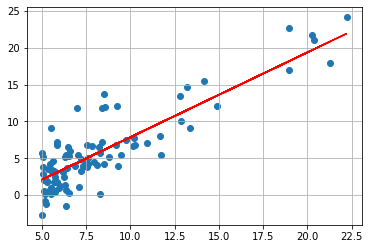

In [2]:
#Réression linéaire
#####################
#1)chargement des données
import pandas as pd
path="C:/EPF/2022_2023/MIN/IAII/séance2/TP2/donnees_TP2.csv"
df = pd.read_csv(path)

#selection de la première colonne de notre dataset et redimensionnement
X = df.iloc[0:len(df),0]
X=X.values.reshape(len(X),1)
#selection de deuxième colonnes de notre dataset et redimensionnement
Y = df.iloc[0:len(df),1] 
Y=Y.values.reshape(len(X),1).ravel()

#2)visualisation des données
import matplotlib.pyplot as plt
axes = plt.axes()
axes.grid() # dessiner une grille pour une meilleur lisibilité du graphe
plt.scatter(X,Y) # X et Y sont les variables extraites dans le paragraphe précédent

#3)Apliquer l'algo
from sklearn.svm import LinearSVR
model = LinearSVR(epsilon=1.5,max_iter=1200000)


# Entrainement du modèle
model.fit(X, Y)


#4) effectuer des prédictions
X_new = [[21.72]]  # Chypre gdp_per_capita
print("prédiction = ",model.predict(X_new))
# retourne : 22.14674235
Ypred=model.predict(X)
plt.plot(X,Ypred,'r')

rmse =  0.10040492646091594
r2 =  0.71822657365254


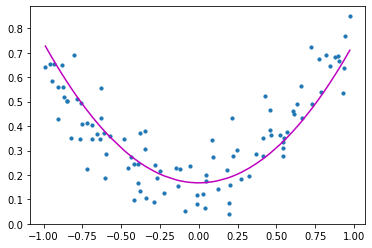

In [4]:
import numpy as np
#génération de données
np.random.seed(42)
m = 100
x = 2 * np.random.rand(m, 1) - 1
y = (0.2 + 0.1 * x + 0.5 * x**2 + np.random.randn(m, 1)/10).ravel()
    

#Appliquer une regression polynomiale
import operator

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import SVR
model = SVR(kernel="poly", degree=2, C=100, epsilon=0.1, gamma="scale")

#Entrainement
model.fit(x, y)

#Prédiction
y_poly_pred = model.predict(x)

#Affcihage des métrique rmse et r2
rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
r2 = r2_score(y,y_poly_pred)
print("rmse = ",rmse)
print("r2 = ",r2)

#Affichage du graphique
plt.scatter(x, y, s=10)
# trier les valeurs avant le tracé
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)
plt.plot(x, y_poly_pred, color='m')
plt.show()
